In [109]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

# Analisis

In [65]:
df=pd.read_csv('data/train.csv')

In [66]:
df

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500


**Distribución de datos**

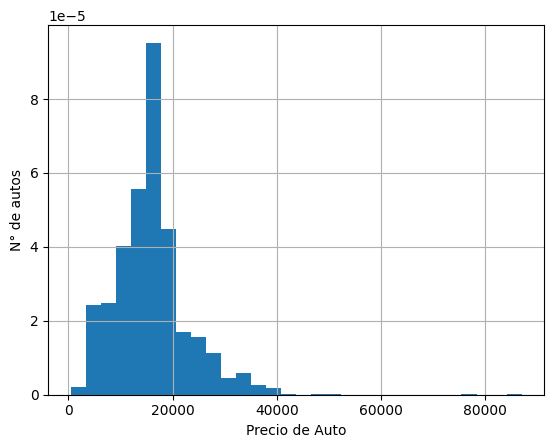

In [67]:
df['price'].hist(bins=30,density=True)
plt.xlabel('Precio de Auto')
plt.ylabel('N° de autos')
plt.show()

De este grafico se puede observar que la distribución de los datos esta hacia la derecha, para transformarla en una gaussiana se debe aplicar una transformación logaritmica

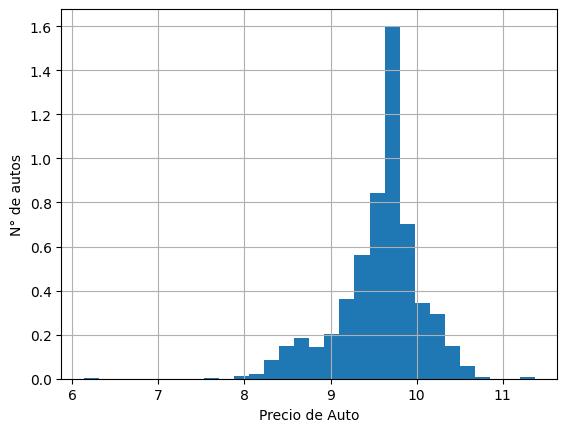

In [68]:
np.log(df['price']).hist(bins=30,density=True)
plt.xlabel('Precio de Auto')
plt.ylabel('N° de autos')
plt.show()

**Tipos de datos**

In [69]:
df.dtypes

model            object
year              int64
motor_type       object
running          object
wheel            object
color            object
type             object
status           object
motor_volume    float64
price             int64
dtype: object

In [70]:
def transform_running(run):
    if run[-2:]=='km':
        return float(run.replace('km',''))
    else:
        return float(run.replace('miles',''))*1.609344

In [71]:
df['running']=df['running'].apply(transform_running)
df

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000.0000,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000.0000,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,152887.6800,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,220480.1280,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000.0000,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,193121.2800,left,white,sedan,good,2.0,12400
1638,toyota,2014,petrol,170000.0000,left,black,sedan,good,2.0,16500
1639,nissan,2018,petrol,110883.8016,left,blue,suv,good,2.0,19500
1640,nissan,2019,petrol,49889.6640,left,black,suv,excellent,2.0,19500


In [72]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
num_vars = [var for var in df.columns if df[var].dtype != 'O']


print('Número de variables númericas: ', len(num_vars))
print('Número de variables categoricas: ', len(cat_vars))

Número de variables númericas:  4
Número de variables categoricas:  6


**Trato de nulos**

In [73]:
for col in df.columns:
    n_nulos=df[col].isnull().sum()
    print(f'La columna {col} tiene {n_nulos} nulos')

La columna model tiene 0 nulos
La columna year tiene 0 nulos
La columna motor_type tiene 0 nulos
La columna running tiene 0 nulos
La columna wheel tiene 0 nulos
La columna color tiene 0 nulos
La columna type tiene 0 nulos
La columna status tiene 0 nulos
La columna motor_volume tiene 0 nulos
La columna price tiene 0 nulos


Se puede ver que no hay nulos dentro de los datos.

## Variables Temporales

Text(0, 0.5, 'Precio medio de autos por año')

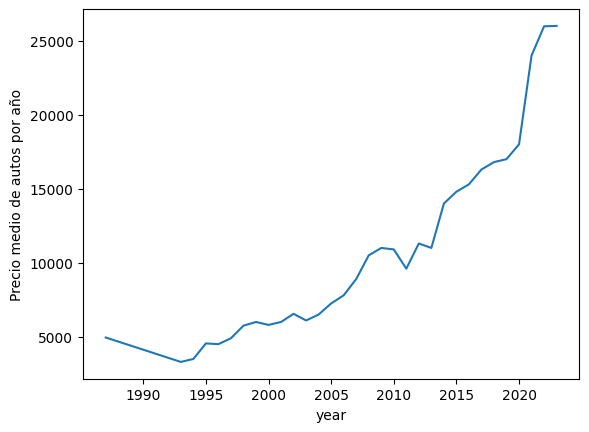

In [75]:
df.groupby('year')['price'].median().plot()
plt.ylabel('Precio medio de autos por año')

Se puede observar que los autos más nuevos son los que más alto precio tienen

## Variables Continuas

Las variables númericas son continuas como son motor_volume y running

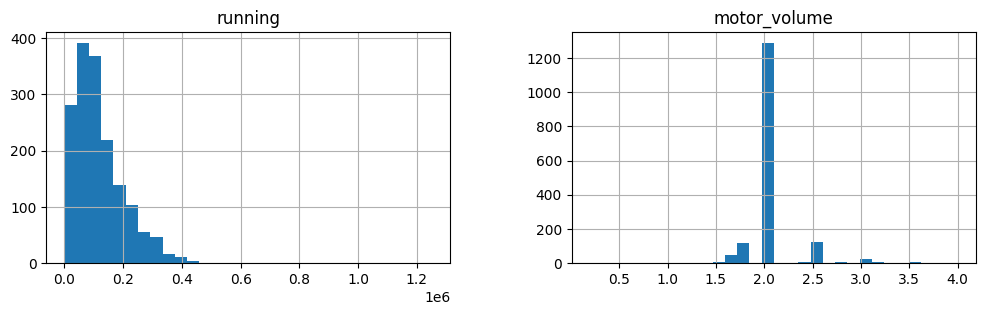

In [90]:
df[['running','motor_volume']].hist(bins=30, figsize=(12,3))
plt.show()

Se puede ver que para running se debe aplicar una función logaritmica

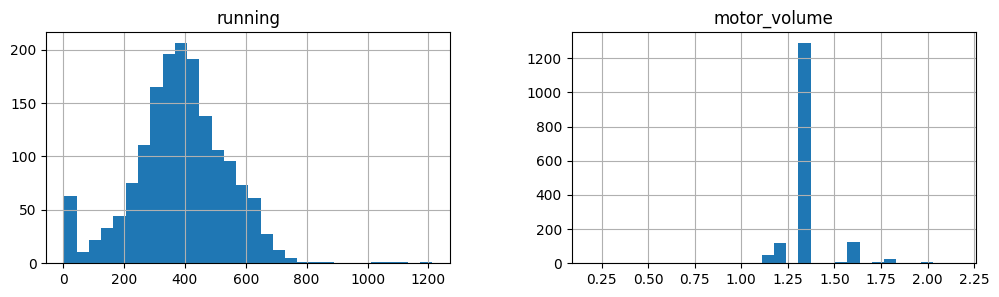

In [98]:

df['running'], param = stats.yeojohnson(df['running'])
df['motor_volume'], param = stats.yeojohnson(df['motor_volume'])

df[['running','motor_volume']].hist(bins=30, figsize=(12, 3))
plt.show()

Se puede ver que la variable running se adapta bien a la transformación yeojohnson, en cuanto a motor_volume se puede ver una transformación no tan gaussiana pero en cuanto se ejecute el modelo se podra ver el rendimiento de este.

## Variables Categoricas

<Axes: >

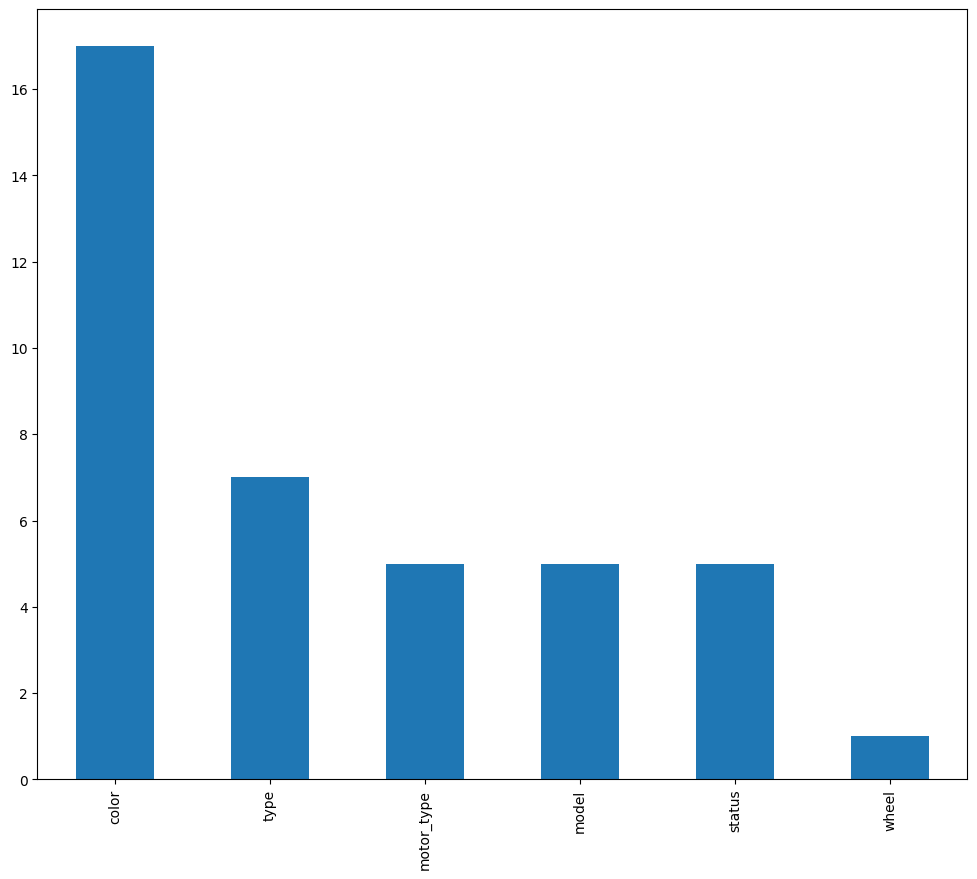

In [104]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,10))

Se puede ver que la columna wheel tiene 1 solo valor dentro de la columna, entonces esta no va incidir en el modelo, es muy probable que esta se elimine.

In [105]:
df['status'].unique()

array(['excellent', 'good', 'crashed', 'normal', 'new'], dtype=object)

## Variable Calificadora

In [106]:
qual_mappings = {'excellent': 3, 'good':2, 'crashed': 0, 'normal': 1, 'new': 4}

In [107]:
df['status'] = df['status'].map(qual_mappings)

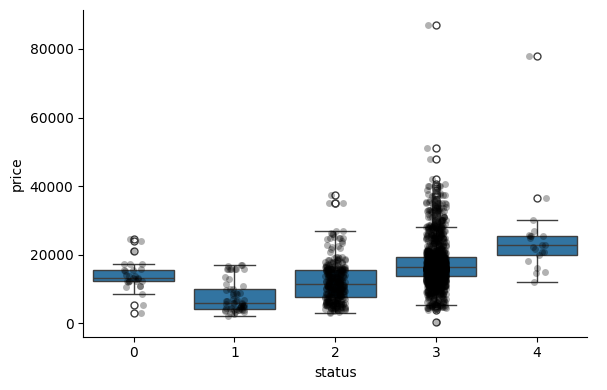

In [111]:
sns.catplot(x='status', y='price', data=df, kind="box", height=4, aspect=1.5)
sns.stripplot(x='status', y='price', data=df, jitter=0.1, alpha=0.3, color='k')
plt.show()

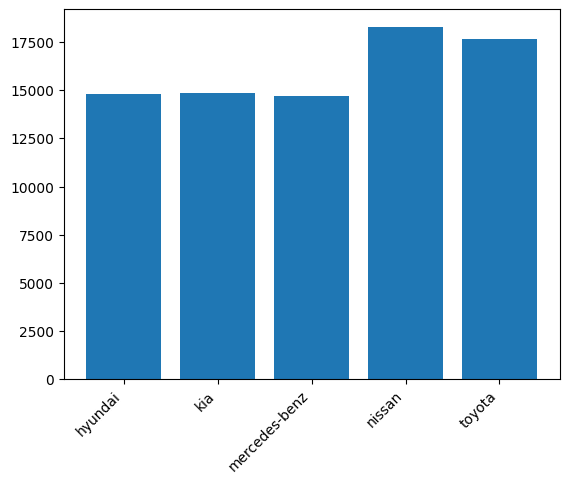

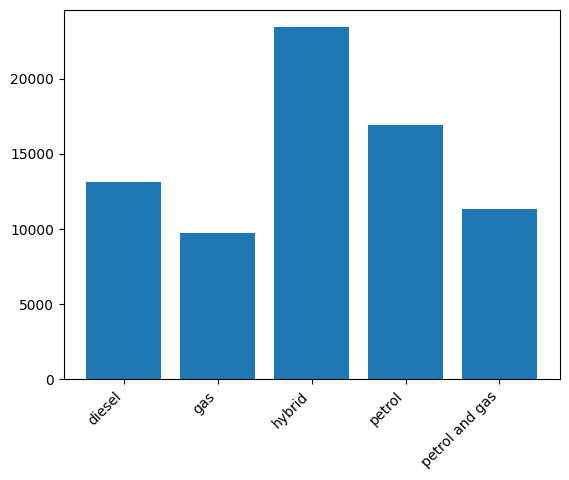

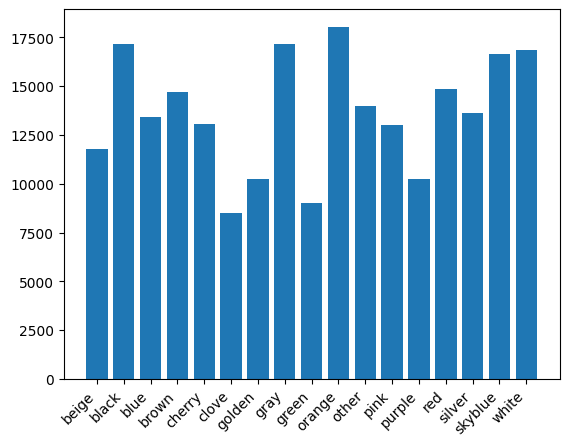

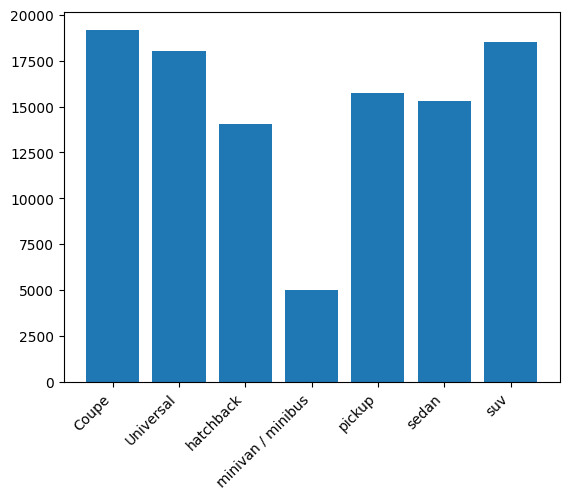

In [117]:
for i in ['model', 'motor_type', 'color', 'type']:
    mean_prices = df.groupby(i)['price'].mean()
    plt.bar(mean_prices.index, mean_prices.values)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Feature Engineering

In [118]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import joblib

Se divide el dataset en entrenamiento y validación

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['price'], axis=1), # predictive variables
    df['price'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((1477, 9), (165, 9))